# 4.8 Model information
In this notebook information is extracted from the model and building process for the manuscript and supplementary data.
<br>1.1 Model version overview
<br>1.2 Reaction overview

2.1 Subsystem of MG & added reactions (notebook 3.1)
<br>2.2 Visualisation of subsystems
<br>2.3 Origin of added reactions

3.1 Growth rate on biolog media
<br>3.2 Growth rate at other conditions
<br>3.3 Growth rate on carbon sources (Supplementary data - S4)

In [1]:
import cobra
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 1.1 Model version overview

In [2]:
# Load EcN model
EcN_ID = 'CP022686.1'
EcN_model_MG = cobra.io.load_json_model('../data/models/%s_MG.json'%EcN_ID)
EcN_model_draft = cobra.io.load_json_model('../data/models/%s_draft_3.1.json'%EcN_ID)
EcN_model_0 = cobra.io.load_json_model('../data/models/%s_draft_3.3.json'%EcN_ID)
EcN_model_1 = cobra.io.load_json_model('../data/models/%s_cur_4.1.json'%EcN_ID)
EcN_model_2 = cobra.io.load_json_model('../data/models/%s_cur_4.2.json'%EcN_ID)
EcN_model_3 = cobra.io.load_json_model('../data/models/%s_cur_4.3.json'%EcN_ID)
EcN_model_4 = cobra.io.load_json_model('../data/models/%s_cur_4.4.json'%EcN_ID)
EcN_model_5 = cobra.io.load_json_model('../data/models/%s_cur_4.5.json'%EcN_ID)
EcN_model_6 = cobra.io.load_json_model('../data/models/%s_cur_4.6.json'%EcN_ID)
EcN_model_7 = cobra.io.load_json_model('../data/models/%s_cur_4.7.json'%EcN_ID)
EcN_model_8 = cobra.io.load_json_model('../data/models/%s_cur_4.8.json'%EcN_ID)

In [43]:
model_overview = pd.DataFrame(columns=['id', 'version', 'genes', 'reactions', 'metabolites'])
model_overview.set_index('id', inplace = True)

counter = -2

# Gather the general information on the draft models
for model in [EcN_model_MG, EcN_model_draft, EcN_model_0, EcN_model_1, EcN_model_2,EcN_model_3, EcN_model_4, EcN_model_5, EcN_model_6, EcN_model_7, EcN_model_8]:
    model_overview.loc[model, 'version'] = counter
    model_overview.loc[model, 'genes'] = len(model.genes)
    model_overview.loc[model, 'reactions'] = len(model.reactions)
    model_overview.loc[model, 'metabolites'] = len(model.metabolites)
    counter += 1

model_overview

,version,genes,reactions,metabolites
id,,,,
iML1515,-2,1516,2712,1877
CP022686.1,-1,1478,2867,2069
CP022686.1,0,1508,3078,2189
CP022686.1,1,1508,3016,2189
CP022686.1,2,1509,3016,2189
CP022686.1,3,1509,3017,2189
CP022686.1,4,1509,3017,2189
CP022686.1,5,1510,3012,2189
CP022686.1,6,1536,3145,2305


In [44]:
model_overview['gene_diff'] = model_overview.genes.diff()
model_overview['reaction_diff'] = model_overview.reactions.diff()
model_overview['metabolite_diff'] = model_overview.metabolites.diff()
model_overview

,version,genes,reactions,metabolites,gene_diff,reaction_diff,metabolite_diff
id,,,,,,,
iML1515,-2,1516,2712,1877,NaN,NaN,NaN
CP022686.1,-1,1478,2867,2069,-38,155,192
CP022686.1,0,1508,3078,2189,30,211,120
CP022686.1,1,1508,3016,2189,0,-62,0
CP022686.1,2,1509,3016,2189,1,0,0
CP022686.1,3,1509,3017,2189,0,1,0
CP022686.1,4,1509,3017,2189,0,0,0
CP022686.1,5,1510,3012,2189,1,-5,0
CP022686.1,6,1536,3145,2305,26,133,116


In [48]:
# Load the reaction origin dataframe
rxn_origin = pd.read_csv('../tables/rxn_origin.csv', usecols=['reaction', 'origin', 'added', 'notebook', 'notes'])
rxn_origin.set_index('reaction', inplace=True)

# Create a dataframe to check that the rxn_origin_df overview is correct
check_overview = pd.DataFrame(columns=['version', 'reactions added', 'reactions removed'])
check_overview.set_index('version', inplace = True)

removed_df = rxn_origin[rxn_origin['added'] == 'removed'] # find all the genes that were removed

# Gather the general information on the draft models
for nr in range(1,9):
    version_df = rxn_origin[rxn_origin['notebook'] == float('4.%s'%nr)] # only get the current notebook
    added = len(version_df[version_df['added'] == 'manual']) # find all added reactions
    removed = len(removed_df[removed_df['notes'].str.contains('4.%s'%nr)])
    
    check_overview.loc[nr, 'reactions added'] = added
    check_overview.loc[nr, 'reactions removed'] = removed
    
check_overview

,reactions added,reactions removed
version,,
1,0,62
2,2,2
3,1,0
4,0,0
5,0,5
6,134,0
7,0,0
8,1,2


In [49]:
# Number of duplicates removed
removed_4_1 = rxn_origin[rxn_origin.notes.str.contains('4.1')]
removed_4_1 = removed_4_1[removed_4_1['added'] == 'removed']
removed_4_1 = removed_4_1[~removed_4_1['notes'].str.contains('unbound flux')]
print('4.1 duplicates removed:', len(removed_4_1))

# Number of unboud flux reactions removed
print('4.1 unbound flux removed:', len(rxn_origin[rxn_origin.notes.str.contains('unbound flux')]))

4.1 duplicates removed: 48
4.1 unbound flux removed: 14


In [47]:
model.reactions.PGM

Reaction identifier,PGM
Name,Phosphoglycerate mutase
Memory address,0x242b5f5dcc0
Stoichiometry,2pg_c <=> 3pg_c D-Glycerate 2-phosphate <=> 3-Phospho-D-glycerate
GPR,CIW80_21755 or CIW80_12775
Lower bound,-1000.0
Upper bound,1000.0


## 1.2 Reaction overview

In [8]:
# Load EcN model
EcN_ID = 'CP022686.1'
model=cobra.io.load_json_model('../data/models/%s_cur_4.8.json'%EcN_ID)

In [9]:
# Flux analysis
fva_result = cobra.flux_analysis.flux_variability_analysis(model) 
essen_rxn = cobra.flux_analysis.find_essential_reactions(model)
essen_rxn_list = [rxn.id for rxn in list(essen_rxn)]

In [10]:
# Store information in dataframe
df_reactions = pd.DataFrame(columns=['ID', 'Name', 'Reaction Formula', 'Gene Rules', 'Subsystem', 
                            'Essentiality', 'LB', 'UB', 'FVA_min', 'FVA_max'])
df_reactions.set_index('ID', inplace=True)
for rxn in model.reactions:
    bigg_id = rxn.id
    df_reactions.loc[bigg_id, 'Name'] = rxn.name
    df_reactions.loc[bigg_id, 'Reaction Formula'] = rxn.reaction
    df_reactions.loc[bigg_id, 'Subsystem'] = rxn.subsystem
    df_reactions.loc[bigg_id, 'Gene Rules'] = rxn.gene_reaction_rule
    df_reactions.loc[bigg_id, 'LB'] = rxn.lower_bound
    df_reactions.loc[bigg_id, 'UB'] = rxn.upper_bound
    df_reactions.loc[bigg_id, 'FVA_min'] = fva_result.loc[bigg_id, 'minimum']
    df_reactions.loc[bigg_id, 'FVA_max'] = fva_result.loc[bigg_id, 'maximum']
    if bigg_id in essen_rxn_list:
        df_reactions.loc[bigg_id, 'Essentiality'] = 'Essential'
    else:
        df_reactions.loc[bigg_id, 'Essentiality'] = 'Not essential'

df_reactions.head()

,Name,Reaction Formula,Gene Rules,Subsystem,Essentiality,LB,UB,FVA_min,FVA_max
ID,,,,,,,,,
CYTDK2,Cytidine kinase (GTP),cytd_c + gtp_c --> cmp_c + gdp_c + h_c,CIW80_04120,Nucleotide Salvage Pathway,Not essential,0.0,1000.0,0.0,-0.0
XPPT,Xanthine phosphoribosyltransferase,prpp_c + xan_c --> ppi_c + xmp_c,CIW80_19465,Nucleotide Salvage Pathway,Not essential,0.0,1000.0,0.0,-0.0
HXPRT,Hypoxanthine phosphoribosyltransferase (Hypoxa...,hxan_c + prpp_c --> imp_c + ppi_c,CIW80_19465 or CIW80_18380,Nucleotide Salvage Pathway,Not essential,0.0,1000.0,0.0,-0.0
NDPK5,Nucleoside-diphosphate kinase (ATP:dGDP),atp_c + dgdp_c <=> adp_c + dgtp_c,CIW80_20510 or CIW80_06420,Nucleotide Salvage Pathway,Not essential,-1000.0,1000.0,0.0,-0.0
SHK3Dr,Shikimate dehydrogenase,3dhsk_c + h_c + nadph_c <=> nadp_c + skm_c,CIW80_10920 or CIW80_01330,"Tyrosine, Tryptophan, and Phenylalanine Metabo...",Essential,-1000.0,1000.0,0.308497,0.308497


In [11]:
df_reactions[df_reactions['Name'].str.contains('lactate')]

,Name,Reaction Formula,Gene Rules,Subsystem,Essentiality,LB,UB,FVA_min,FVA_max
ID,,,,,,,,,
ACLS,Acetolactate synthase,h_c + 2.0 pyr_c --> alac__S_c + co2_c,(CIW80_18090 and CIW80_18095) or (CIW80_13230 ...,"Valine, Leucine, and Isoleucine Metabolism",Essential,0.0,1000.0,1.01358,1.01358
KARA2,Ketol-acid reductoisomerase (2-Acetolactate),2ahbut_c + h_c + nadph_c <=> 23dhmp_c + nadp_c,CIW80_13735,"Valine, Leucine, and Isoleucine Metabolism",Essential,-1000.0,1000.0,0.344425,0.344425
EX_lac__D_e,D-lactate exchange,lac__D_e -->,,Extracellular exchange,Not essential,0.0,1000.0,0.0,-0.0
L_LACtex,L-lactate transport via diffusion (extracellul...,lac__L_e <=> lac__L_p,CIW80_22660 or CIW80_25725 or CIW80_05020 or C...,"Transport, Outer Membrane",Not essential,-1000.0,1000.0,0.0,0.0
D_LACtex,D-lactate transport via diffusion (extracellul...,lac__D_e <=> lac__D_p,CIW80_19480 or CIW80_22660 or CIW80_25725 or C...,"Transport, Outer Membrane",Not essential,-1000.0,1000.0,0.0,0.0
L_LACt2rpp,L-lactate reversible transport via proton symp...,h_p + lac__L_p <=> h_c + lac__L_c,CIW80_12725 or CIW80_09235,"Transport, Inner Membrane",Not essential,-1000.0,1000.0,-0.0,0.0
LDH_D2,D-lactate dehydrogenase,lac__D_c + q8_c --> pyr_c + q8h2_c,CIW80_04455,Oxidative Phosphorylation,Not essential,0.0,1000.0,0.0,0.0
LDH_D,D-lactate dehydrogenase,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c,CIW80_25745,Pyruvate Metabolism,Not essential,-1000.0,1000.0,-0.0,-0.0
D_LACt2pp,D-lactate transport via proton symport (peripl...,h_p + lac__D_p <=> h_c + lac__D_c,CIW80_12725 or CIW80_09235,"Transport, Inner Membrane",Not essential,-1000.0,1000.0,-0.0,0.0


In [12]:
with model:
    model.objective = "EX_lac__D_e"
    production = model.slim_optimize()
    print(production)

40.0


In [13]:
# Save dataframe as .csv
df_reactions.to_csv('../tables/CP022686.1_cur_4.8_reactions_info.csv')

In [14]:
# Divide by subsystem
subsystems = df_reactions['Subsystem'].unique().tolist()

df_reactions['Subsystem'].value_counts()[:15]
# df_reactions['Subsystem'].value_counts(normalize=True)

Extracellular exchange                         446
Transport, Inner Membrane                      406
Transport, Outer Membrane                      364
Glycerophospholipid Metabolism                 246
Cofactor and Prosthetic Group Biosynthesis     227
Alternate Carbon Metabolism                    214
Inorganic Ion Transport and Metabolism         166
Nucleotide Salvage Pathway                     151
Cell Envelope Biosynthesis                     136
Secondary metabolite biosynthesis              109
Lipopolysaccharide Biosynthesis / Recycling     67
Oxidative Phosphorylation                       52
Membrane Lipid Metabolism                       43
Arginine and Proline Metabolism                 42
Murein Recycling                                37
Name: Subsystem, dtype: int64

## 1.3 Metabolite overview

In [15]:
# Store information in dataframe
df_met = pd.DataFrame(columns=['ID', 'Name', 'Charge', 'Compartment', 'Elements', 
                            'Formula', 'Formula weight', 'Reactions', 'Annotation'])
df_met.set_index('ID', inplace=True)
for mtb in model.metabolites:
    bigg_id = mtb.id
    df_met.loc[bigg_id, 'Name'] = mtb.name
    df_met.loc[bigg_id, 'Charge'] = mtb.charge
    df_met.loc[bigg_id, 'Compartment'] = mtb.compartment
    df_met.loc[bigg_id, 'Elements'] = str(mtb.elements)
    df_met.loc[bigg_id, 'Formula'] = mtb.formula
    df_met.loc[bigg_id, 'Formula weight'] = mtb.formula_weight
    df_met.loc[bigg_id, 'Reactions'] = mtb.reactions
    df_met.loc[bigg_id, 'Annotation'] = str(mtb.annotation)

df_met.head()

C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'X' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'X' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'X' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWar

C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'X' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'X' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWar

C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'X' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWar

C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWarning: The element 'R' does not appear in the periodic table
  warn(f"The element {e} does not appear in the periodic table")
C:\Users\maxvan\Anaconda3\envs\EcN_model_env\lib\site-packages\cobra\core\metabolite.py:191: UserWar

,Name,Charge,Compartment,Elements,Formula,Formula weight,Reactions,Annotation
ID,,,,,,,,
octapb_c,Octanoate (protein bound),1,c,"{'C': 8, 'H': 15, 'O': 1}",C8H15O,127.2041,(LIPOS: 4fe4s_c + 2.0 amet_c + h_c + nad_c + o...,"{'bigg.metabolite': ['octapb'], 'metanetx.chem..."
cysi__L_e,L Cystine C6H12N2O4S2,0,e,"{'C': 6, 'H': 12, 'N': 2, 'O': 4, 'S': 2}",C6H12N2O4S2,240.30048,"(EX_cysi__L_e: cysi__L_e --> , CYSItex: cysi__...","{'Human Metabolome Database': ['HMDB00192'], '..."
dhap_c,Dihydroxyacetone phosphate,-2,c,"{'C': 3, 'H': 5, 'O': 6, 'P': 1}",C3H5O6P,168.041961,"(FBA3: s17bp_c <=> dhap_c + e4p_c, DHAPT: dha_...","{'Human Metabolome Database': ['HMDB11735'], '..."
prbatp_c,1-(5-Phosphoribosyl)-ATP,-6,c,"{'C': 15, 'H': 19, 'N': 5, 'O': 20, 'P': 4}",C15H19N5O20P4,713.227904,"(ATPPRT: atp_c + prpp_c --> ppi_c + prbatp_c, ...","{'Human Metabolome Database': ['HMDB03665'], '..."
10fthf_c,10-Formyltetrahydrofolate,-2,c,"{'C': 20, 'H': 21, 'N': 7, 'O': 7}",C20H21N7O7,471.42344,(ULA4NFT: 10fthf_c + udpLa4n_c --> h_c + thf_c...,"{'Human Metabolome Database': ['HMDB00972'], '..."


In [16]:
# Save dataframe as .csv
df_met.to_csv('../tables/CP022686.1_cur_4.8_metabolites_info.csv')

## 2.1 Subsystem of MG & added reactions (notebook 3.1)

In [17]:
# Load the reaction origin dataframe
rxn_origin = pd.read_csv('../tables/rxn_origin.csv', usecols=['reaction', 'origin', 'added', 'notebook', 'notes'])
rxn_origin

,reaction,origin,added,notebook,notes
0,CYTDK2,iML1515,automatic,3.1,none
1,XPPT,iML1515,automatic,3.1,none
2,HXPRT,iML1515,automatic,3.1,none
3,NDPK5,iML1515,automatic,3.1,none
4,SHK3Dr,iML1515,automatic,3.1,none
...,...,...,...,...,...
3217,CLBTinter2,New Reaction,manual,4.6,none
3218,CLBTinter3,New Reaction,manual,4.6,none
3219,CLBTNtex,New Reaction,manual,4.6,none
3220,EX_clbtn_e,New Reaction,manual,4.6,none


In [18]:
# Merge reaction origin dataframe with df_reactions dataframe
rxn_df = pd.merge(rxn_origin, df_reactions, left_on = 'reaction', right_index =True)
rxn_df = rxn_df[rxn_df['added'] != 'removed'] # Do not take into account reactions that were removed in later notebooks
# rxn_df = rxn_df[rxn_df['added'] != 'manual'] # Do not take into account reactions that were added in later notebooks
# rxn_df.head()

The reactions removed in later stages are not considered in this analysis

In [19]:
# Group unassigned/empty subsystems in "other"
rxn_df.loc[rxn_df['Subsystem'] == '', 'Subsystem'] = 'Other'
rxn_df.loc[rxn_df['Subsystem'] == 'Unassigned', 'Subsystem'] = 'Other'

In [20]:
### Create a dataframe which shows in which stage of construction (MG, ref or manual) the reactions were added

subsystem_df = pd.DataFrame(columns=['MG', 'ref', 'iDK1463', 'manual', 'total'])

# Create a "total" dataset (To make this graph with seaborn)
subsystem_df['total'] = rxn_df['Subsystem'].value_counts()

# Subsystems of reactions added to iML1515 reduced model from reference strains
added_rxn = rxn_df[rxn_df['origin'] != 'iML1515'] 
added_rxn = added_rxn[added_rxn['origin'] != 'iDK1463']
ref_rxn = added_rxn[added_rxn['added'] != 'manual']
subsystem_df['ref'] = ref_rxn['Subsystem'].value_counts()

# Subsystems of reactions manually added
manual_rxn = added_rxn[added_rxn['added'] == 'manual']
subsystem_df['manual'] = manual_rxn['Subsystem'].value_counts()

# Subsystems of reactions part of iML1515 reduced model
MG_rxn = rxn_df[rxn_df['origin'] == 'iML1515']
subsystem_df['MG'] = MG_rxn['Subsystem'].value_counts()

# Subsystems of reactions part of iDK1463 model
DK_rxn = rxn_df[rxn_df['origin'] == 'iDK1463']
subsystem_df['iDK1463'] = DK_rxn['Subsystem'].value_counts()

# subsystem_df = subsystem_df[subsystem_df['total'] > 15 ]
subsystem_df.fillna(0, inplace=True)

subsystem_df

,MG,ref,iDK1463,manual,total
Extracellular exchange,331.0,0.0,109.0,6.0,446
"Transport, Inner Membrane",334.0,18.0,46.0,1.0,399
"Transport, Outer Membrane",315.0,31.0,18.0,0.0,364
Glycerophospholipid Metabolism,246.0,0.0,0.0,0.0,246
Cofactor and Prosthetic Group Biosynthesis,212.0,12.0,3.0,0.0,227
Alternate Carbon Metabolism,187.0,15.0,10.0,1.0,213
Inorganic Ion Transport and Metabolism,123.0,15.0,1.0,27.0,166
Nucleotide Salvage Pathway,150.0,1.0,0.0,0.0,151
Cell Envelope Biosynthesis,135.0,1.0,0.0,0.0,136
Secondary metabolite biosynthesis,4.0,4.0,0.0,101.0,109


In [21]:
# Count number of transport reactions added
# Also include the transport reactions in "Other"
transport_rxn = subsystem_df[subsystem_df.index.str.contains('Transport')]
transport_rxn
transport_rxn.sum()

MG         772.0
ref         65.0
iDK1463     65.0
manual      28.0
total      930.0
dtype: float64

In [22]:
# Count the total number of reactions added in each stage
subsystem_df.sum()

MG         2583.0
ref         199.0
iDK1463     216.0
manual      137.0
total      3135.0
dtype: float64

# 2.2 Visualisation of subsystems
Code for plotting was based on: https://randyzwitch.com/creating-stacked-bar-chart-seaborn/

In [23]:
# Combine MG and ref & MG_ref + iDK1463 for representation in the figure
subsystem_df['MG_ref'] = subsystem_df['MG'] + subsystem_df['ref']
subsystem_df['MG_ref_DK'] = subsystem_df['MG_ref'] + subsystem_df['iDK1463']


# Combine all amino acid related reactions
subsystem_df.loc['Amino Acid Metabolism'] = (subsystem_df.loc['Arginine and Proline Metabolism'] +
                                             subsystem_df.loc['Tyrosine, Tryptophan, and Phenylalanine Metabolism'] +
                                             subsystem_df.loc['Threonine and Lysine Metabolism'] +
                                             subsystem_df.loc['Glycine and Serine Metabolism'] +
                                             subsystem_df.loc['Valine, Leucine, and Isoleucine Metabolism'] +
                                             subsystem_df.loc['Methionine Metabolism'] +
                                             subsystem_df.loc['Cysteine Metabolism'] +
                                             subsystem_df.loc['Histidine Metabolism'] +
                                             subsystem_df.loc['Alanine and Aspartate Metabolism'] +
                                             subsystem_df.loc['Glutamate Metabolism'] +
                                             subsystem_df.loc['Lysine Metabolism'] +
                                             subsystem_df.loc['Tryptophan metabolism'] +
                                             subsystem_df.loc['Phenylalanine Metabolism'] +
                                             subsystem_df.loc['Tyrosine metabolism']+
                                             subsystem_df.loc['Methionine Salvage'])

subsystem_df.drop(['Arginine and Proline Metabolism',
                  'Tyrosine, Tryptophan, and Phenylalanine Metabolism',
                  'Threonine and Lysine Metabolism',
                  'Glycine and Serine Metabolism',
                  'Valine, Leucine, and Isoleucine Metabolism',
                  'Methionine Metabolism',
                  'Cysteine Metabolism',
                  'Histidine Metabolism',
                  'Alanine and Aspartate Metabolism',
                  'Glutamate Metabolism',
                  'Lysine Metabolism',
                  'Tryptophan metabolism',
                  'Phenylalanine Metabolism',
                  'Tyrosine metabolism',
                  'Methionine Salvage'], inplace=True)

# Add "Transport" and "Exchange" to "Other"
subsystem_df.loc['Other'] = subsystem_df.loc['Exchange'] + subsystem_df.loc['Transport'] + subsystem_df.loc['Other']
subsystem_df.drop(['Exchange', 'Transport'], inplace=True)

# Place the "Other" catagory as last for the graph
other_s = subsystem_df.loc['Other']
subsystem_df = subsystem_df.drop(index ='Other')
subsystem_df = subsystem_df.sort_values('total', ascending=False)
subsystem_df = subsystem_df.append(other_s, ignore_index=False)

subsystem_df

C:\Users\maxvan\AppData\Local\Temp\ipykernel_38848\2180586829.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subsystem_df = subsystem_df.append(other_s, ignore_index=False)


,MG,ref,iDK1463,manual,total,MG_ref,MG_ref_DK
Extracellular exchange,331.0,0.0,109.0,6.0,446.0,331.0,440.0
"Transport, Inner Membrane",334.0,18.0,46.0,1.0,399.0,352.0,398.0
"Transport, Outer Membrane",315.0,31.0,18.0,0.0,364.0,346.0,364.0
Glycerophospholipid Metabolism,246.0,0.0,0.0,0.0,246.0,246.0,246.0
Cofactor and Prosthetic Group Biosynthesis,212.0,12.0,3.0,0.0,227.0,224.0,227.0
Alternate Carbon Metabolism,187.0,15.0,10.0,1.0,213.0,202.0,212.0
Amino Acid Metabolism,170.0,10.0,5.0,0.0,185.0,180.0,185.0
Inorganic Ion Transport and Metabolism,123.0,15.0,1.0,27.0,166.0,138.0,139.0
Nucleotide Salvage Pathway,150.0,1.0,0.0,0.0,151.0,151.0,151.0
Cell Envelope Biosynthesis,135.0,1.0,0.0,0.0,136.0,136.0,136.0


In [24]:
# Add everything below 5 reactions to "Other"
subsystem_df.loc['Other'] = (subsystem_df.loc['Biomass and maintenance functions'] +
                             subsystem_df.loc['Penicillin Breakdown'] +
                             subsystem_df.loc['Iron Metabolism'] +
                             subsystem_df.loc['Glutathione Metabolism'] +
                             subsystem_df.loc['Inositol Metabolism'] +
                             subsystem_df.loc['Histidine metabolism'] +
                             subsystem_df.loc['Benzoate Degradation'] +
                             subsystem_df.loc['Other'])
subsystem_df.drop(['Biomass and maintenance functions',
                   'Penicillin Breakdown',
                   'Iron Metabolism',
                   'Glutathione Metabolism',
                   'Inositol Metabolism',
                   'Histidine metabolism',
                   'Benzoate Degradation'], inplace=True)

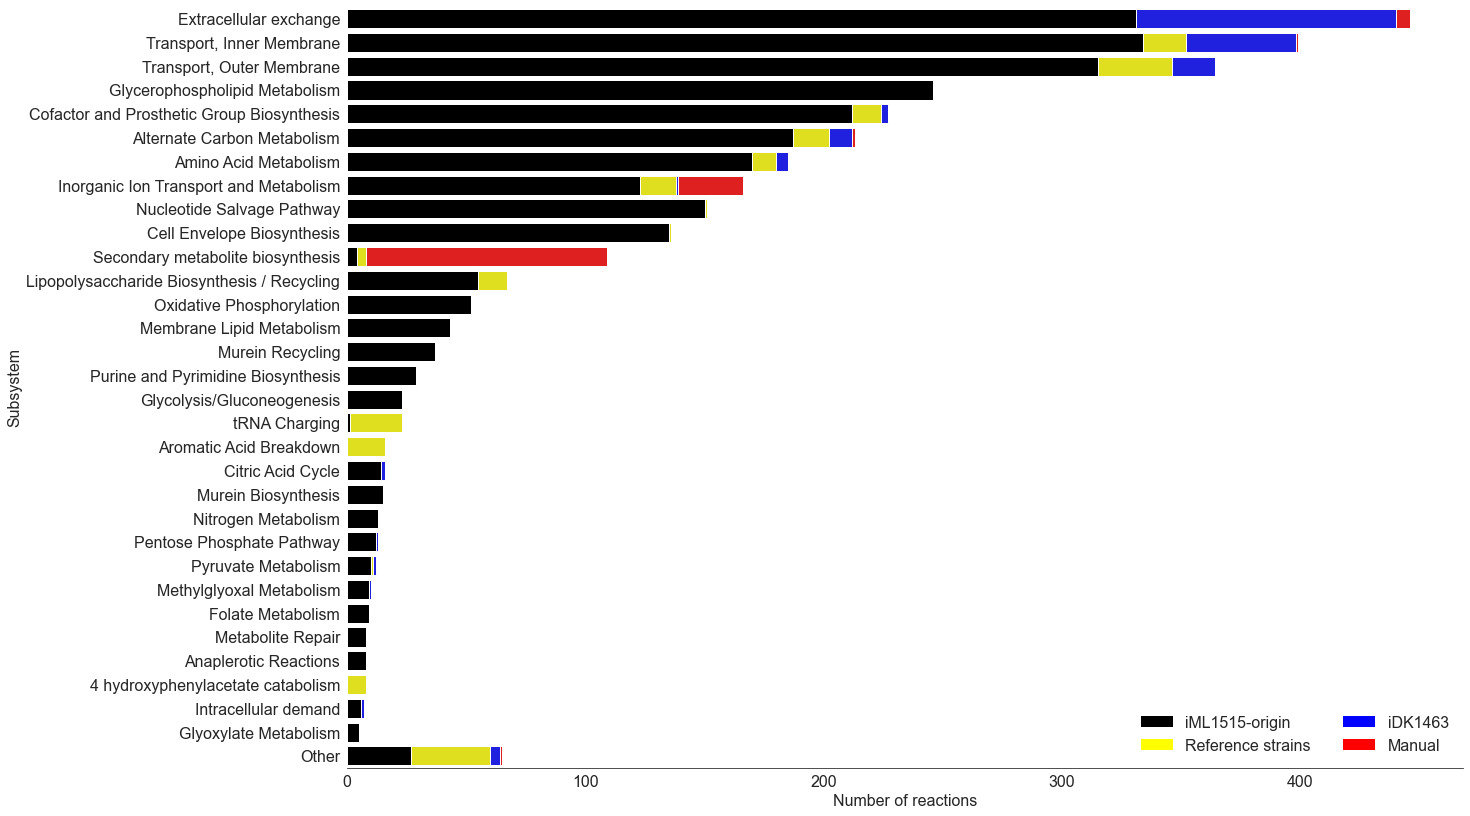

In [25]:
%matplotlib inline

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 14)})

#Plot 1 - background - "total" (top) series
sns_plot = sns.barplot(x = subsystem_df.total, y = subsystem_df.index, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = subsystem_df.MG_ref_DK, y = subsystem_df.index, color = "blue")

#Plot 3 - overlay - "bottom" series
bottom2_plot = sns.barplot(x = subsystem_df.MG_ref, y = subsystem_df.index, color = "yellow")

#Plot 4 - overlay - "bottom" series
top_plot = sns.barplot(x = subsystem_df.MG, y = subsystem_df.index, color = "black")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')
bottombar2 = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
midbar = plt.Rectangle((0,0),1,1,fc='black',  edgecolor = 'none')
legend = plt.legend([midbar, bottombar2, bottombar, topbar], ['iML1515-origin', 'Reference strains', 'iDK1463', 'Manual'], loc=4, ncol = 2, prop={'size':16})
legend.draw_frame(False)

#Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Subsystem")
bottom_plot.set_xlabel("Number of reactions")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)
    
# Save figure
plt.savefig("../figures/3.3_subsystem_plot.eps", bbox_inches='tight') #bbox_inches to include complete y-axis labels

# 2.3 Origin of added reactions

In [26]:
# From which models were the tRNA charging reactions added?
rxn_df[rxn_df['Subsystem'] == 'tRNA Charging']

,reaction,origin,added,notebook,notes,Name,Reaction Formula,Gene Rules,Subsystem,Essentiality,LB,UB,FVA_min,FVA_max
135,GLUTRS,iML1515,automatic,3.1,none,Glutamyl-tRNA synthetase,atp_c + glu__L_c + trnaglu_c --> amp_c + glutr...,CIW80_05875,tRNA Charging,Essential,0.0,1000.0,0.004214,0.004214
2616,TYRTRS,iLF82_1304,automatic,3.1,none,Tyrosyl-tRNA synthetase,atp_c + trnatyr_c + tyr__L_c --> amp_c + ppi_c...,CIW80_01035,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0
2619,PHETRS,iLF82_1304,automatic,3.1,none,Phenylalanyl-tRNA synthetase,atp_c + phe__L_c + trnaphe_c --> amp_c + phetr...,CIW80_01445 and CIW80_01450,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2620,THRTRS,iLF82_1304,automatic,3.1,none,Threonyl-tRNA synthetase,atp_c + thr__L_c + trnathr_c --> amp_c + ppi_c...,CIW80_01475,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2625,ASPTRS,iLF82_1304,automatic,3.1,none,Aspartyl-tRNA synthetase,asp__L_c + atp_c + trnaasp_c --> amp_c + asptr...,CIW80_02255,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2626,ARGTRS,iLF82_1304,automatic,3.1,none,Arginyl-tRNA synthetase,arg__L_c + atp_c + trnaarg_c --> amp_c + argtr...,CIW80_02600,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0
2632,METTRS,iLF82_1304,automatic,3.1,none,Methionyl-tRNA synthetase,atp_c + met__L_c + trnamet_c --> amp_c + mettr...,CIW80_04360,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2690,HISTRS,iLF82_1304,automatic,3.1,none,Histidyl-tRNA synthetase,atp_c + his__L_c + trnahis_c --> amp_c + histr...,CIW80_06400,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0
2695,ALATRS,iLF82_1304,automatic,3.1,none,Alanyl-tRNA synthetase,ala__L_c + atp_c + trnaala_c --> alatrna_c + a...,CIW80_07155,tRNA Charging,Not essential,0.0,1000.0,0.0,0.0
2699,LYSTRS,iLF82_1304,automatic,3.1,none,Lysyl-tRNA synthetase,atp_c + lys__L_c + trnalys_c --> amp_c + lystr...,CIW80_08175,tRNA Charging,Not essential,0.0,1000.0,0.0,-0.0


In [27]:
# Load strain_info dataframe
strain_info = pd.read_csv('../tables/strain_info.csv')

# Merge the added_rxn dataframe with the strain_info dataframe to get the strain names.
added_rxn = pd.merge(added_rxn, strain_info, left_on = 'origin', right_on='Model Name')

added_distribution = added_rxn['Strain'].value_counts()
print(len(added_distribution))
added_distribution

10


Escherichia coli LF82              149
Escherichia coli W CP002185         30
Escherichia coli UM146               8
Shigella flexneri 2a str. 2457T      3
Escherichia coli B str. REL606       2
Escherichia coli ED1a                2
Shigella flexneri 2002017            2
Escherichia coli SE15                1
Shigella boydii CDC 3083-94          1
Escherichia coli KO11FL              1
Name: Strain, dtype: int64

# 3. Growth rate

## 3.1 Growth rate on biolog media

In [2]:
# Load EcN model
EcN_ID = 'CP022686.1'
EcN_model= cobra.io.load_json_model('../data/models/%s_cur_4.8.json'%EcN_ID)
iML1515 = cobra.io.load_json_model('../data/models/iML1515.json')
iDK1463 = cobra.io.load_json_model('../data/models_ecn/iDK1463.json')

In [29]:
# Test normal FBA

for model in [EcN_model, iML1515, iDK1463]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 15

    medium['EX_nh4_e'] = 19 # 19 mM NH4Cl
    medium['EX_pi_e'] = 60 # 48mM Na2HPO4 + 22 mM KH2PO4  
    medium['EX_so4_e'] = 2 # 2 mM MgSO4

    medium['EX_mg2_e'] = 2 # 2 mM MgSO4
    medium['EX_ca2_e'] = 0.1 # 0.1 mM CaCl2SS

    medium['EX_na1_e'] = 105 # 48 mM Na2HPO4 + 9 mM NaCl
    medium['EX_k_e'] = 22 # 22 mM KH2PO4
    medium['EX_cl_e'] = 28 # 9 mM NaCl + 19 mM NH4Cl

    medium['EX_thm_e'] = 0.38 # 0.1 g/L > 0.1/265.355 x 1000 = 0.376854 mM

    model.medium = medium
    
    solution = model.optimize()
    print(model.id, solution.objective_value)

iHM1533 1.0480048626023761
iML1515 1.328550773766176
iDK1463 1.0722299735716063


In [30]:
pfba_solution = cobra.flux_analysis.pfba(EcN_model)
solution_df = pfba_solution.to_frame()
solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M']

fluxes           1.048005
reduced_costs   -2.000000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64

In [31]:
pfba_solution_iML = cobra.flux_analysis.pfba(iML1515)
solution_iML_df = pfba_solution_iML.to_frame()
solution_iML_df.loc['BIOMASS_Ec_iML1515_core_75p37M']

fluxes           1.328551
reduced_costs   -2.000000
Name: BIOMASS_Ec_iML1515_core_75p37M, dtype: float64

In [32]:
EcN_model.summary(fva=0.90)

Metabolite,Reaction,Flux,Range,C-Number,C-Flux
ca2_e,EX_ca2_e,0.04842,[0.04358; 0.04842],0,0.00%
cl_e,EX_cl_e,0.05474,[0.04927; 0.05474],0,0.00%
cobalt2_e,EX_cobalt2_e,0.03293,[0.02964; 0.03293],0,0.00%
cu2_e,EX_cu2_e,0.03054,[0.02749; 0.2101],0,0.00%
fe2_e,EX_fe2_e,0.03636,[-8.393; 11.87],0,0.00%
fe3_e,EX_fe3_e,0.03475,[-11.81; 8.457],0,0.00%
glc__D_e,EX_glc__D_e,15,[12.08; 15],6,100.00%
k_e,EX_k_e,0.04964,[0.04467; 0.04964],0,0.00%
mg2_e,EX_mg2_e,0.07985,[0.07186; 0.07985],0,0.00%
mn2_e,EX_mn2_e,0.03533,[0.03179; 0.03533],0,0.00%


## 3.2 Growth rate at other conditions

In [33]:
#Establish a definition that initializes models to an in silico representation of M9 media
def m9(model):
    for reaction in model.reactions:
        if 'EX_' in  reaction.id:
            reaction.lower_bound=0 
            
    model.reactions.EX_ca2_e.lower_bound=-1000
    model.reactions.EX_cl_e.lower_bound=-1000
    model.reactions.EX_co2_e.lower_bound=-1000
    model.reactions.EX_cobalt2_e.lower_bound=-1000
    model.reactions.EX_cu2_e.lower_bound=-1000
    model.reactions.EX_fe2_e.lower_bound=-1000
    model.reactions.EX_fe3_e.lower_bound=-1000
    model.reactions.EX_h_e.lower_bound=-1000
    model.reactions.EX_h2o_e.lower_bound=-1000
    model.reactions.EX_k_e.lower_bound=-1000
    model.reactions.EX_mg2_e.lower_bound=-1000
    model.reactions.EX_mn2_e.lower_bound=-1000
    model.reactions.EX_mobd_e.lower_bound=-1000
    model.reactions.EX_na1_e.lower_bound=-1000
    model.reactions.EX_tungs_e.lower_bound=-1000
    model.reactions.EX_zn2_e.lower_bound=-1000
    model.reactions.EX_ni2_e.lower_bound=-1000
    model.reactions.EX_sel_e.lower_bound=-1000
    model.reactions.EX_slnt_e.lower_bound=-1000
    model.reactions.EX_glc__D_e.lower_bound=-20
    model.reactions.EX_so4_e.lower_bound=-1000
    model.reactions.EX_nh4_e.lower_bound=-1000
    model.reactions.EX_pi_e.lower_bound=-1000
    model.reactions.EX_cbl1_e.lower_bound=-.01
    model.reactions.EX_o2_e.lower_bound=-20
       
    return model

### Plate reader
Plate reader with LB the growth rate was 0.6 h-1 (37 degree, 100 µL/well) in M9 it was 0.5 h-1 (37 degree, 100 µL/well)

In [34]:
# Test pFBA

for model in [EcN_model, iDK1463]:

    # Define the biolog media
    m9(model)
    model.reactions.EX_glc__D_e.lower_bound=-55.5 #10g/L
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    if model == EcN_model:
        print(solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M'])
    if model == iDK1463:
        print(solution_df.loc['BIOMASS_Ec_iDK1463_core_59p80M'])

fluxes           2.032502
reduced_costs   -2.000000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64
fluxes           2.218045
reduced_costs   -2.000000
Name: BIOMASS_Ec_iDK1463_core_59p80M, dtype: float64


### Tom shaker
TOM shaker: mineral media + 3 g/L initial glucose, 37 degree, 13 mL (in 500 mL shake flask), 225 rpm: between 0.7 and 0.9 h-1

In [35]:
# Test pFBA

for model in [EcN_model, iDK1463]:

    # Define the biolog media
    m9(model)
    model.reactions.EX_glc__D_e.lower_bound=-16.65 #3g/L
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    if model == EcN_model:
        print(solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M'])
    if model == iDK1463:
        print(solution_df.loc['BIOMASS_Ec_iDK1463_core_59p80M'])

fluxes           1.091828
reduced_costs   -2.000000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64
fluxes           1.178283
reduced_costs   -2.000000
Name: BIOMASS_Ec_iDK1463_core_59p80M, dtype: float64


### AMBR 
In the ambr with mineral medium: (15 g/L initial glucose, 37 degree, stirring at 1000 rpm, 1 vvm) growth rate  was 0.8 h-1

In [36]:
# Test pFBA

for model in [EcN_model, iDK1463]:

    # Define the biolog media
    m9(model)
    model.reactions.EX_glc__D_e.lower_bound=-83.3 #15g/L
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    if model == EcN_model:
        print(solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M'])
    if model == iDK1463:
        print(solution_df.loc['BIOMASS_Ec_iDK1463_core_59p80M'])

fluxes           2.669118
reduced_costs   -2.000000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64
fluxes           2.917632
reduced_costs   -2.000000
Name: BIOMASS_Ec_iDK1463_core_59p80M, dtype: float64


### Test for conditions of Revelles (Csr) paper
Growth rate was 0.79 +- 0.02

In [4]:
# Test pFBA

for model in [EcN_model, iDK1463]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 15

    medium['EX_nh4_e'] = 19 # 19 mM NH4Cl
    medium['EX_pi_e'] = 60 # 48mM Na2HPO4 + 22 mM KH2PO4  
    medium['EX_so4_e'] = 2 # 2 mM MgSO4

    medium['EX_mg2_e'] = 2 # 2 mM MgSO4
    medium['EX_ca2_e'] = 0.1 # 0.1 mM CaCl2SS

    medium['EX_na1_e'] = 105 # 48 mM Na2HPO4 + 9 mM NaCl
    medium['EX_k_e'] = 22 # 22 mM KH2PO4
    medium['EX_cl_e'] = 28 # 9 mM NaCl + 19 mM NH4Cl

    medium['EX_thm_e'] = 0.38 # 0.1 g/L > 0.1/265.355 x 1000 = 0.376854 mM

    model.medium = medium
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    if model == EcN_model:
        print(solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M'])
    if model == iDK1463:
        print(solution_df.loc['BIOMASS_Ec_iDK1463_core_59p80M'])

fluxes           1.048005
reduced_costs   -2.000000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64
fluxes           1.07223
reduced_costs   -2.00000
Name: BIOMASS_Ec_iDK1463_core_59p80M, dtype: float64


In [5]:
with EcN_model:
    # Define the biolog media
    medium = EcN_model.medium
    medium['EX_glc__D_e'] = 15

    medium['EX_nh4_e'] = 19 # 19 mM NH4Cl
    medium['EX_pi_e'] = 60 # 48mM Na2HPO4 + 22 mM KH2PO4  
    medium['EX_so4_e'] = 2 # 2 mM MgSO4

    medium['EX_mg2_e'] = 2 # 2 mM MgSO4
    medium['EX_ca2_e'] = 0.1 # 0.1 mM CaCl2SS

    medium['EX_na1_e'] = 105 # 48 mM Na2HPO4 + 9 mM NaCl
    medium['EX_k_e'] = 22 # 22 mM KH2PO4
    medium['EX_cl_e'] = 28 # 9 mM NaCl + 19 mM NH4Cl

    medium['EX_thm_e'] = 0.38 # 0.1 g/L > 0.1/265.355 x 1000 = 0.376854 mM

    EcN_model.medium = medium

    EcN_model.reactions.BIOMASS_EcN_iHM1533_core_59p80M.add_metabolites({'pg160_p': 0.0148265788551,
                                                                         'pg161_p': 0.013732749318999999,
                                                                         'pe181_p': 0.0132509524519,
                                                                         'pg181_p': 0.00909808994019})
    
    pfba_solution = cobra.flux_analysis.pfba(EcN_model)
    solution_df = pfba_solution.to_frame()
    print(solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M'])
    

fluxes           1.0586
reduced_costs   -2.0000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64


### Test for conditions microgravity paper (https://www.mdpi.com/1422-0067/21/8/2666/htm)
Growth rate was 0.44 h−1
M9 minimal media (47.8 mM Na2HPO4∙7H2O, 22 mM KH2PO4, 8.6 mM NaCl, 18.7 mM NH4Cl, 2 mM MgSO4, and 0.1 mM CaCl2) supplemented with 0.4% glucose (w/v)

In [38]:
# Test pFBA

for model in [EcN_model]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 22.2 # 0.4 g/100mL > 4 g/L > 22.2 mM

    medium['EX_nh4_e'] = 18.7 # 18.7 mM NH4Cl
    medium['EX_pi_e'] = 69.8 # 47.8 mM Na2HPO4∙7H2O +  22 mM KH2PO4
    medium['EX_so4_e'] = 2 # 2 mM MgSO4

    medium['EX_mg2_e'] = 2 # 2 mM MgSO4
    medium['EX_ca2_e'] = 0.1 # 0.1 mM CaCl2

    medium['EX_na1_e'] = 104.2 # 47.8 mM Na2HPO4∙7H2O + 8.6 mM NaCl
    medium['EX_k_e'] = 22 # 22 mM KH2PO4
    medium['EX_cl_e'] = 27.5 # 8.6 mM NaCl + 18.7 mM NH4Cl + 0.1 mM CaCl2


    model.medium = medium
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    print(solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M'])

fluxes           1.239616
reduced_costs   -2.000000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64


### Test for MOPS paper (https://link.springer.com/article/10.1007/s00438-010-0578-8#SecESM1)
Growth rate was ~0.018 h−1 (0.015 when not including the first time point)

MOPS:<br>
1.32 K2HPO4, 9.52 NH4C, 0.523 MgCl2, 0.276 K2SO4, 0.010 FeSO4, 5 x 10-4 CaCl2, 50 NaCl, 40 MOPS, 4 Tricine + mcironutrients: (NH4)6(MO7)24, 3 x 10-6 mM; H3BO3, 4 x 10-4 mM; CoCl2, 3 x 10-6 mM; CuSO4, 10-5 mM; MnCl2, 8 x10-5 mM; ZnSO4, 10-5 mM
https://jb.asm.org/content/jb/119/3/736.full.pdf

In [39]:
# Test pFBA

for model in [EcN_model]:

    # Define the biolog media
    medium = model.medium
    medium['EX_glc__D_e'] = 11.1 # 0.2 g/100mL > 2 g/L > 11.1 mM

    medium['EX_nh4_e'] = 9.52 # NH4C
    medium['EX_pi_e'] = 1.32 # K2HPO4
    medium['EX_so4_e'] = 0.286 # 0.276 K2SO4, 0.010 FeSO4

    medium['EX_mg2_e'] = 0.523 # 0.523 mM MgCl2
    medium['EX_ca2_e'] = 5e-4 # 5 x 10-4 CaCl2

    medium['EX_na1_e'] = 50 # 50 NaCl
    medium['EX_k_e'] = 3.192 # 1.32 K2HPO4, 0.276 K2SO4
    medium['EX_cl_e'] = 50.5235 # 0.523 MgCl2 + 5 x 10-4 CaCl2, 50 NaCl

    medium['EX_mobd_e'] = 24 * 3e-6
    medium['EX_cobalt2_e'] = 3e-6 #
    medium['EX_cu2_e'] = 1e-5 #
    medium['EX_mn2_e'] = 8e-5 #
    medium['EX_zn2_e'] = 1e-5 #

    model.medium = medium
    
    pfba_solution = cobra.flux_analysis.pfba(model)
    solution_df = pfba_solution.to_frame()
    print(solution_df.loc['BIOMASS_EcN_iHM1533_core_59p80M'])

fluxes           0.000095
reduced_costs   -2.000000
Name: BIOMASS_EcN_iHM1533_core_59p80M, dtype: float64


# 3.3 Growth rate on carbon sources (Supplementary data - S4)

In [40]:
# Glucose, Arabinose, Fucose, Galactose, Gluconate, Mannose, N-acetylgalactosamine, N-acetylneuraminate > https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4510460/#!po=30.0000
# Galacturonate, Xylose, Acetate, Fructose, Malate, Maltose, Ribose, Glucuronic, Lactose, N-acetylglucosamine > Pierre Millard - Role of the Csr system in carbon nutrition and in the control of central metabolism in Escherichia coli K-12 MG1655 and Nissle 1917
# (Dextrose), Rhamnose, Sorbitol > https://www.tandfonline.com/doi/full/10.3109/08910600903444267
# EcN is a typical E. coli strain, with the exception that it is capable of metabolizing arginine. This property is seen in just about 7% of all E. coli isolates. > https://www.tandfonline.com/doi/full/10.3109/08910600903444267

carbon_sources = ['EX_arab__L_e',
                 'EX_fuc__L_e',
                 'EX_gal_e',
                 'EX_glcn_e',
                 'EX_man_e',
                 'EX_acgal_e',
                 'EX_acnam_e',
                 'EX_galur_e',
                 'EX_xyl__D_e',
                 'EX_ac_e',
                 'EX_fru_e',
                 'EX_mal__D_e',
                 'EX_mal__L_e',
                 'EX_malt_e',
                 'EX_rib__D_e',
                 'EX_glcur_e',
                 'EX_lcts_e',
                 'EX_acgam_e',
                 'EX_rmn_e',
                 'EX_sbt__D_e',
                 'EX_arg__L_e']

print('Number of carbon sources:', len(carbon_sources))

Number of carbon sources: 21


In [41]:
# Create a dataframe with the carbon sources and EcN growth

# Load EcN model
EcN_model=cobra.io.load_json_model('../data/models/%s_cur_4.8.json'%EcN_ID)

# Create dataframe to store the information
carbon_df = pd.DataFrame(columns=['Carbon source', 'Growth rate'], index=carbon_sources)
carbon_df.index.name = 'Exchange reaction'
carbon_df

# set glucose to zero, to ensure you only have one carbon source
EcN_model.reactions.EX_glc__D_e.lower_bound=0

for c_source in carbon_sources:
    with EcN_model:

        # change to other carbon source
        EcN_model.reactions.get_by_id(c_source).lower_bound=-20
        
        #determine growth on carbon source
        solution = EcN_model.slim_optimize()
        
        # store the solution
        carbon_df.loc[c_source, 'Growth rate'] = solution
        carbon_df.loc[c_source, 'Carbon source'] = EcN_model.reactions.get_by_id(c_source).name
        
carbon_df

,Carbon source,Growth rate
Exchange reaction,,
EX_arab__L_e,L-Arabinose exchange,1.047921
EX_fuc__L_e,L-Fucose exchange,0.908459
EX_gal_e,D-Galactose exchange,1.136623
EX_glcn_e,D-Gluconate exchange,1.102109
EX_man_e,D-Mannose exchange,1.180973
EX_acgal_e,N-Acetyl-D-galactosamine exchange,1.21674
EX_acnam_e,N-Acetylneuraminate exchange,1.359516
EX_galur_e,D-Galacturonate exchange,1.017361
EX_xyl__D_e,D-Xylose exchange,0.914868


In [42]:
# Save as a table
carbon_df.to_csv('../tables/carbon_df.csv')